Error al decodificar JSON: {
  "recetaID": "receta_12",
  "nombre": "Fanesca",
  "descripciÃ³n": {
    "detalle": "Sopa tradicional de Semana Santa, elaborada con granos, pescado seco y leche.",
    "regiÃ³n": "Sierra"
  },
  "tiempoPreparacion": 120,
  "instrucciones": [
    "Cocer los granos por separado.",
    "Desalar el pescado seco.",
    "SofreÃ­r la cebolla, ajo, pimiento y especias en mantequilla.",
    "Agregar los granos cocidos y el pescado seco.",
    "AÃ±adir la leche y cocinar a fuego lento.",
    "Servir caliente con huevo duro y queso rallado."
  ],
  "ingredientes": {
    "frutas": null,
    "lacteos": [
      {
        "nombre": "Leche",
        "cantidad": 500,
        "unidad": "mililitros",
        "informacionNutricional": {
          "calorÃ­as": 210,
          "grasas": 8,
          "proteÃ­nas": 16,
          "carbohidratos": 24,
          "glucosa": 24
        }
      },
      {
        "nombre": "Mantequilla",
        "cantidad": 50,
        "unidad": "gramo

IndexError: index 0 is out of bounds for axis 0 with size 0

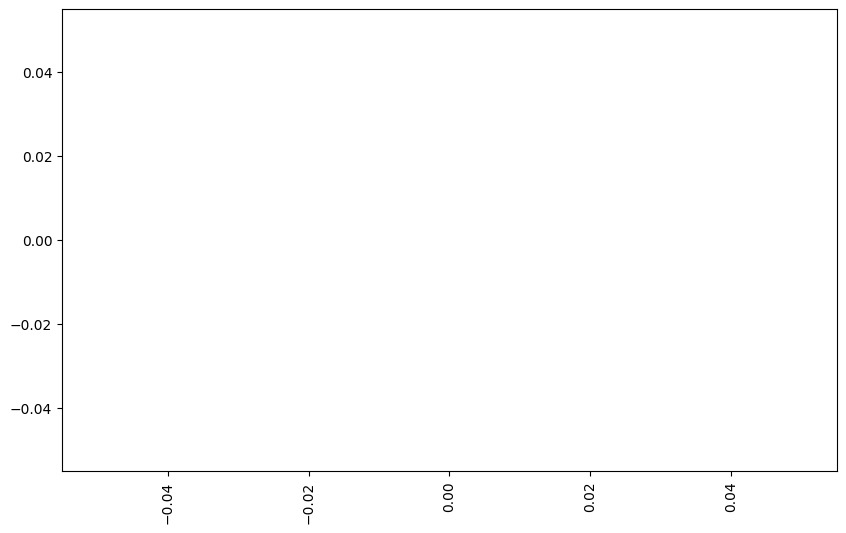

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
with open('json_bdd.txt', 'r') as file:
    data = file.read()

# Separar los objetos JSON
json_objects = data.split('\n\n')

# Crear una lista para almacenar los datos de las recetas
recipes = []

# Procesar cada objeto JSON
for json_obj in json_objects:
    try:
        recipe = json.loads(json_obj)
        recipes.append(recipe)
    except json.JSONDecodeError:
        print(f"Error al decodificar JSON: {json_obj}")

# Función para extraer datos de manera segura
def safe_get(dictionary, *keys):
    for key in keys:
        try:
            dictionary = dictionary[key]
        except (KeyError, TypeError):
            return None
    return dictionary

# Función para contar ingredientes de manera segura
def count_ingredients(recipe):
    ingredients = safe_get(recipe, 'ingredientes')
    if ingredients is None:
        return 0
    return sum(len(v) for v in ingredients.values() if v is not None)

# Crear un DataFrame con los datos básicos de las recetas
df_recipes = pd.DataFrame([
    {
        'nombre': safe_get(r, 'nombre'),
        'region': safe_get(r, 'descripción', 'región'),
        'tiempo_preparacion': safe_get(r, 'tiempoPreparacion'),
        'num_ingredientes': count_ingredients(r)
    } for r in recipes
])

# Mostrar las primeras filas del DataFrame
print(df_recipes.head())

# Estadísticas descriptivas
print(df_recipes.describe())

# Gráfico de barras: Número de recetas por región
plt.figure(figsize=(10, 6))
df_recipes['region'].value_counts().plot(kind='bar')
plt.title('Número de recetas por región')
plt.xlabel('Región')
plt.ylabel('Número de recetas')
plt.show()

# Gráfico de dispersión: Tiempo de preparación vs Número de ingredientes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_recipes, x='tiempo_preparacion', y='num_ingredientes', hue='region')
plt.title('Tiempo de preparación vs Número de ingredientes')
plt.xlabel('Tiempo de preparación (minutos)')
plt.ylabel('Número de ingredientes')
plt.show()

# Crear una función para extraer la información nutricional de manera segura
def extract_nutritional_info(recipe):
    info = {'calorias': 0, 'grasas': 0, 'proteinas': 0, 'carbohidratos': 0, 'glucosa': 0}
    ingredients = safe_get(recipe, 'ingredientes')
    if ingredients is None:
        return info
    for category in ingredients.values():
        if category:
            for ingredient in category:
                nutritional_info = safe_get(ingredient, 'informacionNutricional', {})
                quantity = safe_get(ingredient, 'cantidad', 0)
                for key in info:
                    info[key] += nutritional_info.get(key, 0) * quantity / 100
    return info

# Extraer la información nutricional de todas las recetas
nutritional_info = [extract_nutritional_info(r) for r in recipes]

# Crear un DataFrame con la información nutricional
df_nutrition = pd.DataFrame(nutritional_info)
df_nutrition['nombre'] = [safe_get(r, 'nombre') for r in recipes]
df_nutrition['region'] = [safe_get(r, 'descripción', 'región') for r in recipes]

# Mostrar las primeras filas del DataFrame de información nutricional
print(df_nutrition.head())

# Gráfico de barras: Calorías promedio por región
plt.figure(figsize=(10, 6))
df_nutrition.groupby('region')['calorias'].mean().plot(kind='bar')
plt.title('Calorías promedio por región')
plt.xlabel('Región')
plt.ylabel('Calorías promedio')
plt.show()

# Gráfico de dispersión: Proteínas vs Carbohidratos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nutrition, x='proteinas', y='carbohidratos', hue='region')
plt.title('Proteínas vs Carbohidratos')
plt.xlabel('Proteínas (g)')
plt.ylabel('Carbohidratos (g)')
plt.show()

# Matriz de correlación
correlation_matrix = df_nutrition[['calorias', 'grasas', 'proteinas', 'carbohidratos', 'glucosa']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de información nutricional')
plt.show()